In [1]:
import numpy as np
from PIL import Image
import matplotlib.image as img
import matplotlib.pyplot as plt
import iprocess as ip	# my library

In [11]:
im = Image.open("lena.bmp")
im = np.array(im)

In [21]:
%%time
b_array = ip.binarize(im, 128).astype('uint8')

CPU times: user 474 ms, sys: 4.11 ms, total: 478 ms
Wall time: 481 ms


In [17]:

def binarize(im , threshold):
    
    x,y = np.shape(im) 
    binary = np.zeros(im.shape,dtype = 'bool')

    for row in range(im.shape[0]):
        binary[row] = (im[row] >= threshold)

    return binary

In [22]:
%%time
b2 = binarize(np.array(im), 128).astype('uint8')

CPU times: user 2.66 ms, sys: 1.34 ms, total: 4 ms
Wall time: 3.18 ms


In [5]:
kernel = [[-2,-1],[-2,0],[-2,1],
    [-1,-2],[-1,-1],[-1,0],[-1,1],[-1,2],
    [0,-2],[0,-1],[0,0],[0,1],[0,2],
    [1,-2],[1,-1],[1,0],[1,1],[1,2],
    [2,-1],[2,0],[2,1]]
J_kernel = [[0,-1],[0,0],[1,0]]
K_kernel = [[-1,0],[-1,-1],[0,1]]

In [9]:
%%time
b = ip.erosion(b_array,kernel)

CPU times: user 3.09 s, sys: 21.5 ms, total: 3.11 s
Wall time: 3.18 s


In [7]:
%%time
a = ip.dilation(b_array,kernel)

CPU times: user 3.16 s, sys: 19.6 ms, total: 3.18 s
Wall time: 3.23 s


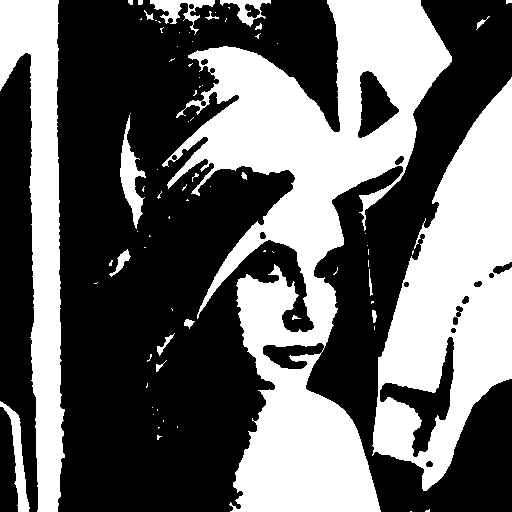

In [10]:
Image.fromarray(255*b.astype('uint8'), mode='L')

In [21]:
test = b_array
invert_t =  np.logical_not(test)
IN = ip.erosion(test, J_kernel)
OUT = ip.erosion(invert_t, K_kernel)

{0, 1}


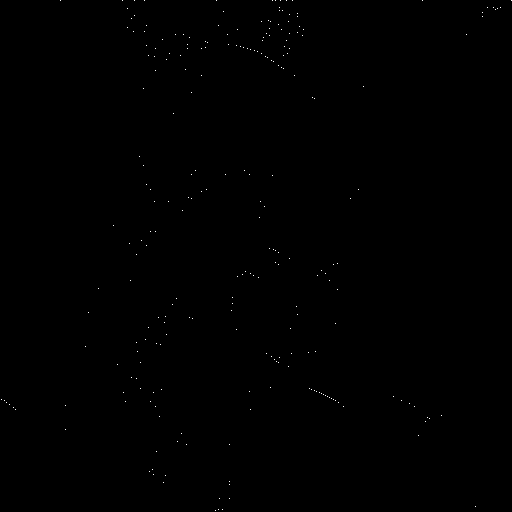

In [23]:
arr = np.logical_and(IN,OUT).astype('uint8')
print(set(arr.reshape(arr.shape[0] * arr.shape[1])))
Image.fromarray(255*arr, mode = 'L')

In [273]:
IN == 255

array([[False,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [274]:
OUT == 255

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False,  True,  True, ...,  True,  True, False],
       [False,  True,  True, ...,  True,  True, False],
       [False,  True,  True, ...,  True,  True, False]])

In [284]:
%%time
np.logical_and((IN == 255), (OUT==255)).any()

CPU times: user 882 µs, sys: 405 µs, total: 1.29 ms
Wall time: 839 µs


False

In [285]:
%%time
(((IN + OUT) / 2) == 255).any()

CPU times: user 1.49 ms, sys: 892 µs, total: 2.38 ms
Wall time: 1.28 ms


False

In [286]:
np.array([1,0,10], dtype='bool')

array([ True, False,  True])

In [295]:
test = np.random.randint(2,size=10).astype('bool')

In [296]:
test

array([ True, False,  True, False,  True, False,  True, False,  True,
        True])

In [300]:
%%time
np.logical_not(test)

CPU times: user 14 µs, sys: 0 ns, total: 14 µs
Wall time: 17.2 µs


array([False,  True, False,  True, False,  True, False,  True, False,
       False])

In [301]:
%%time
(1-test).astype('bool')

CPU times: user 43 µs, sys: 20 µs, total: 63 µs
Wall time: 51 µs


array([False,  True, False,  True, False,  True, False,  True, False,
       False])

[]